In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from AGN_plot import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


In [3]:
def plot_group(*args):
    l = len(args)
    if l == 1:
        f, ax = plt.subplot(figsize=(24, 8))
        plot_all(args[0], ax=ax)
        return
    line = int(np.ceil(l / 2))
    f, ax = plt.subplots(line, 2, figsize=(24, 8 * line))
    ax = ax.flatten()
    if l % 2:
        f.delaxes(ax[-1])
    print(l)
    for i, spe in enumerate(args):
        plot_all(spe, ax=ax[i], d=np.array([4]))
    plt.tight_layout()

## Default Model

In [4]:
def plot_default(spe, div=None, d=4, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)

    Abu1.plot(ax=ax, spe=spe, label='X-ray', color=color)
    ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                      fontsize=25)
    ax.set_xlim([1e-1, 1e8])
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot(ax=ax, spe=spe, color=color, linestyle='--', label='X-ray removed')
        
    
    raw = np.loadtxt('./data/2dis_inf')
    t = raw[:, 0] - 1e6
    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    ax.loglog(t,
              abu,
              label='No X-ray',
              color='black',
              linestyle='-.',
              linewidth=3)
    ax.legend(loc='upper left', prop={'size': 20})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


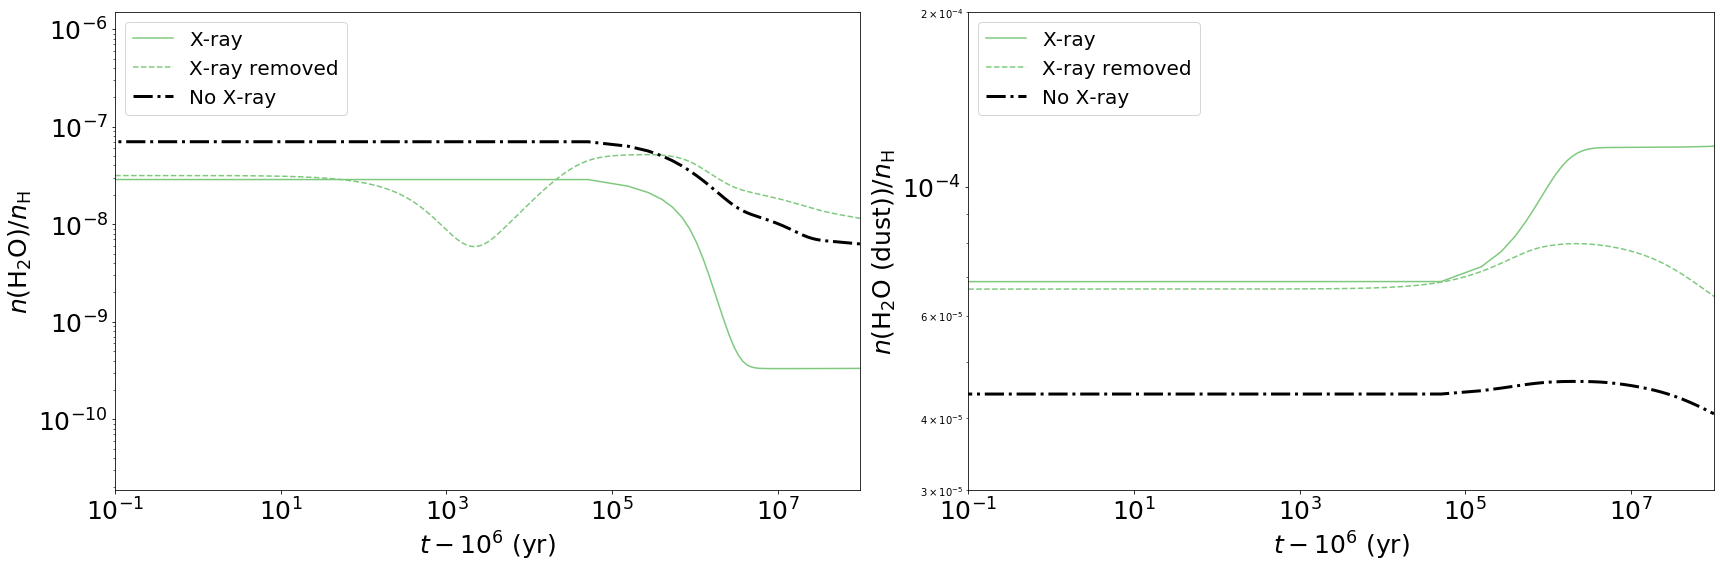

In [18]:
f, ax = plt.subplots(1, 2, figsize=(24, 8), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('H2O', ax=ax[0], color=c_default[0])

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[1],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')))
ax[0].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[1].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-7, 1e-4])
ax[1].set_ylim([2e-4, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('../../../Report/Fig/default.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


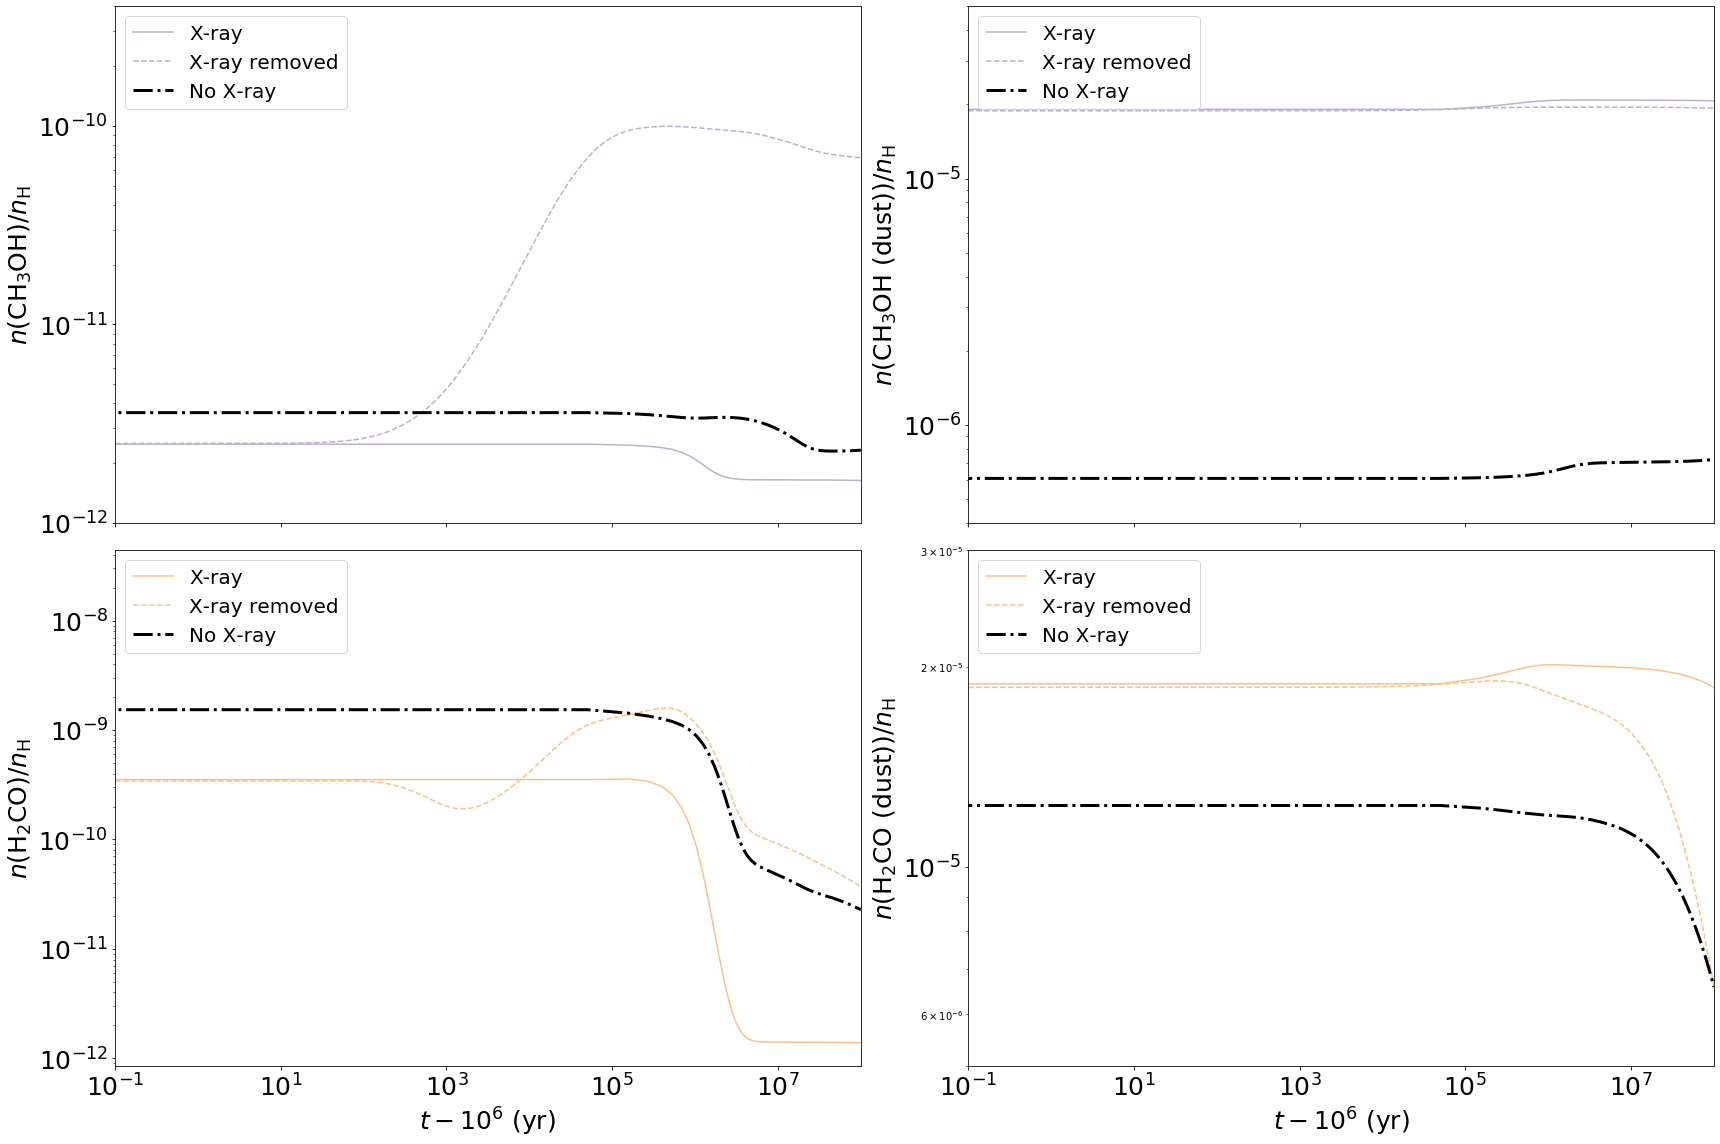

In [19]:
f, ax = plt.subplots(2, 2, figsize=(24, 16), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('CH3OH', ax=ax[0], color=c_default[1])
plot_default('H2CO', ax=ax[2], color=c_default[2])

plot_default('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
             ax=ax[1],
             color=c_default[1],
             label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_default('H_DUSTH_DUSTC_DUSTO_DUST',
             ax=ax[3],
             color=c_default[2],
             label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[2].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[3].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[0].set_ylim([1e-12, 4e-10])
ax[1].set_ylim([4e-7, 5e-5])
ax[3].set_ylim([5e-6, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('../../../Report/Fig/otherprebiotic.eps')

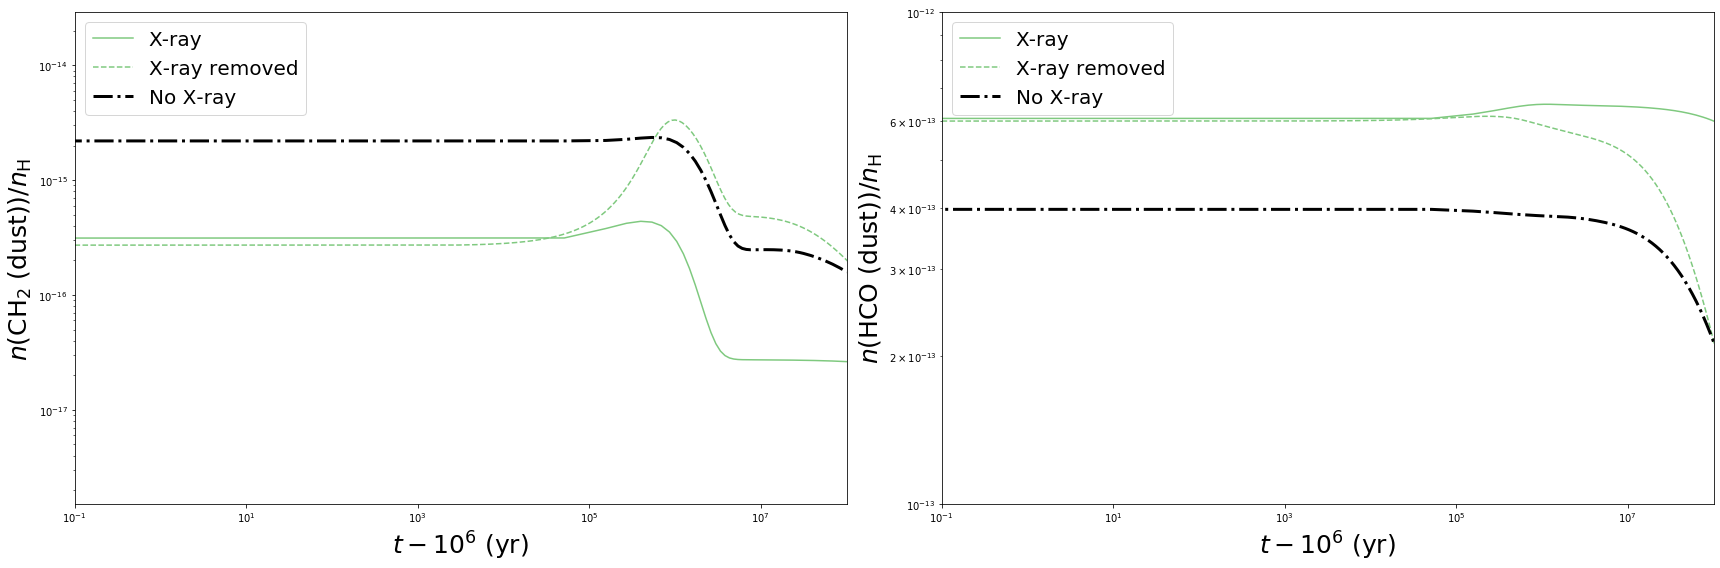

In [21]:
f, ax = plt.subplots(1, 2, figsize=(24, 8), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('C_DUSTH_DUSTH_DUST',
             ax=ax[0],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('CH2')))

plot_default('H_DUSTC_DUSTO_DUST',
             ax=ax[1],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('HCO')))
ax[1].set_ylim(1e-13, 1e-12)
ax[0].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[1].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
plt.tight_layout()

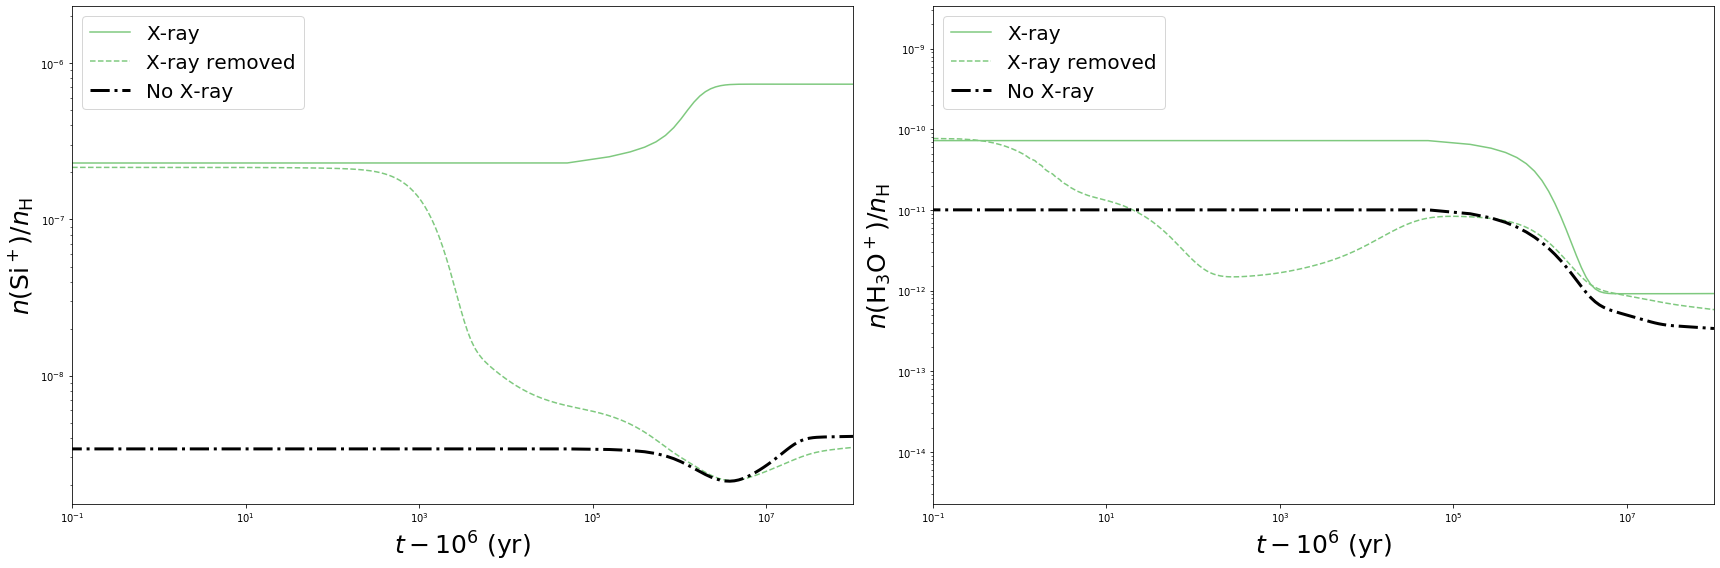

In [7]:
f, ax = plt.subplots(1, 2, figsize=(24, 8), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('SIj', ax=ax[0], color=c_default[0])

plot_default('H3Oj', ax=ax[1], color=c_default[0])
ax[0].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[1].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
plt.tight_layout()

## Galactic Distribution

In [8]:
def plot_dis(spe, div=None, d=4, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    for i, d in enumerate([1,2,4,8]):
        j = str(d)
        Abu1 = Abu(j)
        if div != None:
            Abu1.Div(div)

        Abu1.plot(ax=ax, spe=spe, label='{} kpc'.format(d), color=color[i])
        ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                          fontsize=25)
        ax.set_xlim([1e-1, 1e8])
        if stop:
            j = '0' + str(d)
            Abu0 = Abu(j)
            if div != None:
                Abu.Div(div)
            Abu0.plot(ax=ax, spe=spe, color=color[i], linestyle='--', label=None)
        
    
    raw = np.loadtxt('./data/2dis_inf')
    t = raw[:, 0] - 1e6
    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    ax.loglog(t,
              abu,
              label='No X-ray',
              color='black',
              linestyle='-.',
              linewidth=3)
    ax.legend(loc='lower left', prop={'size': 20})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

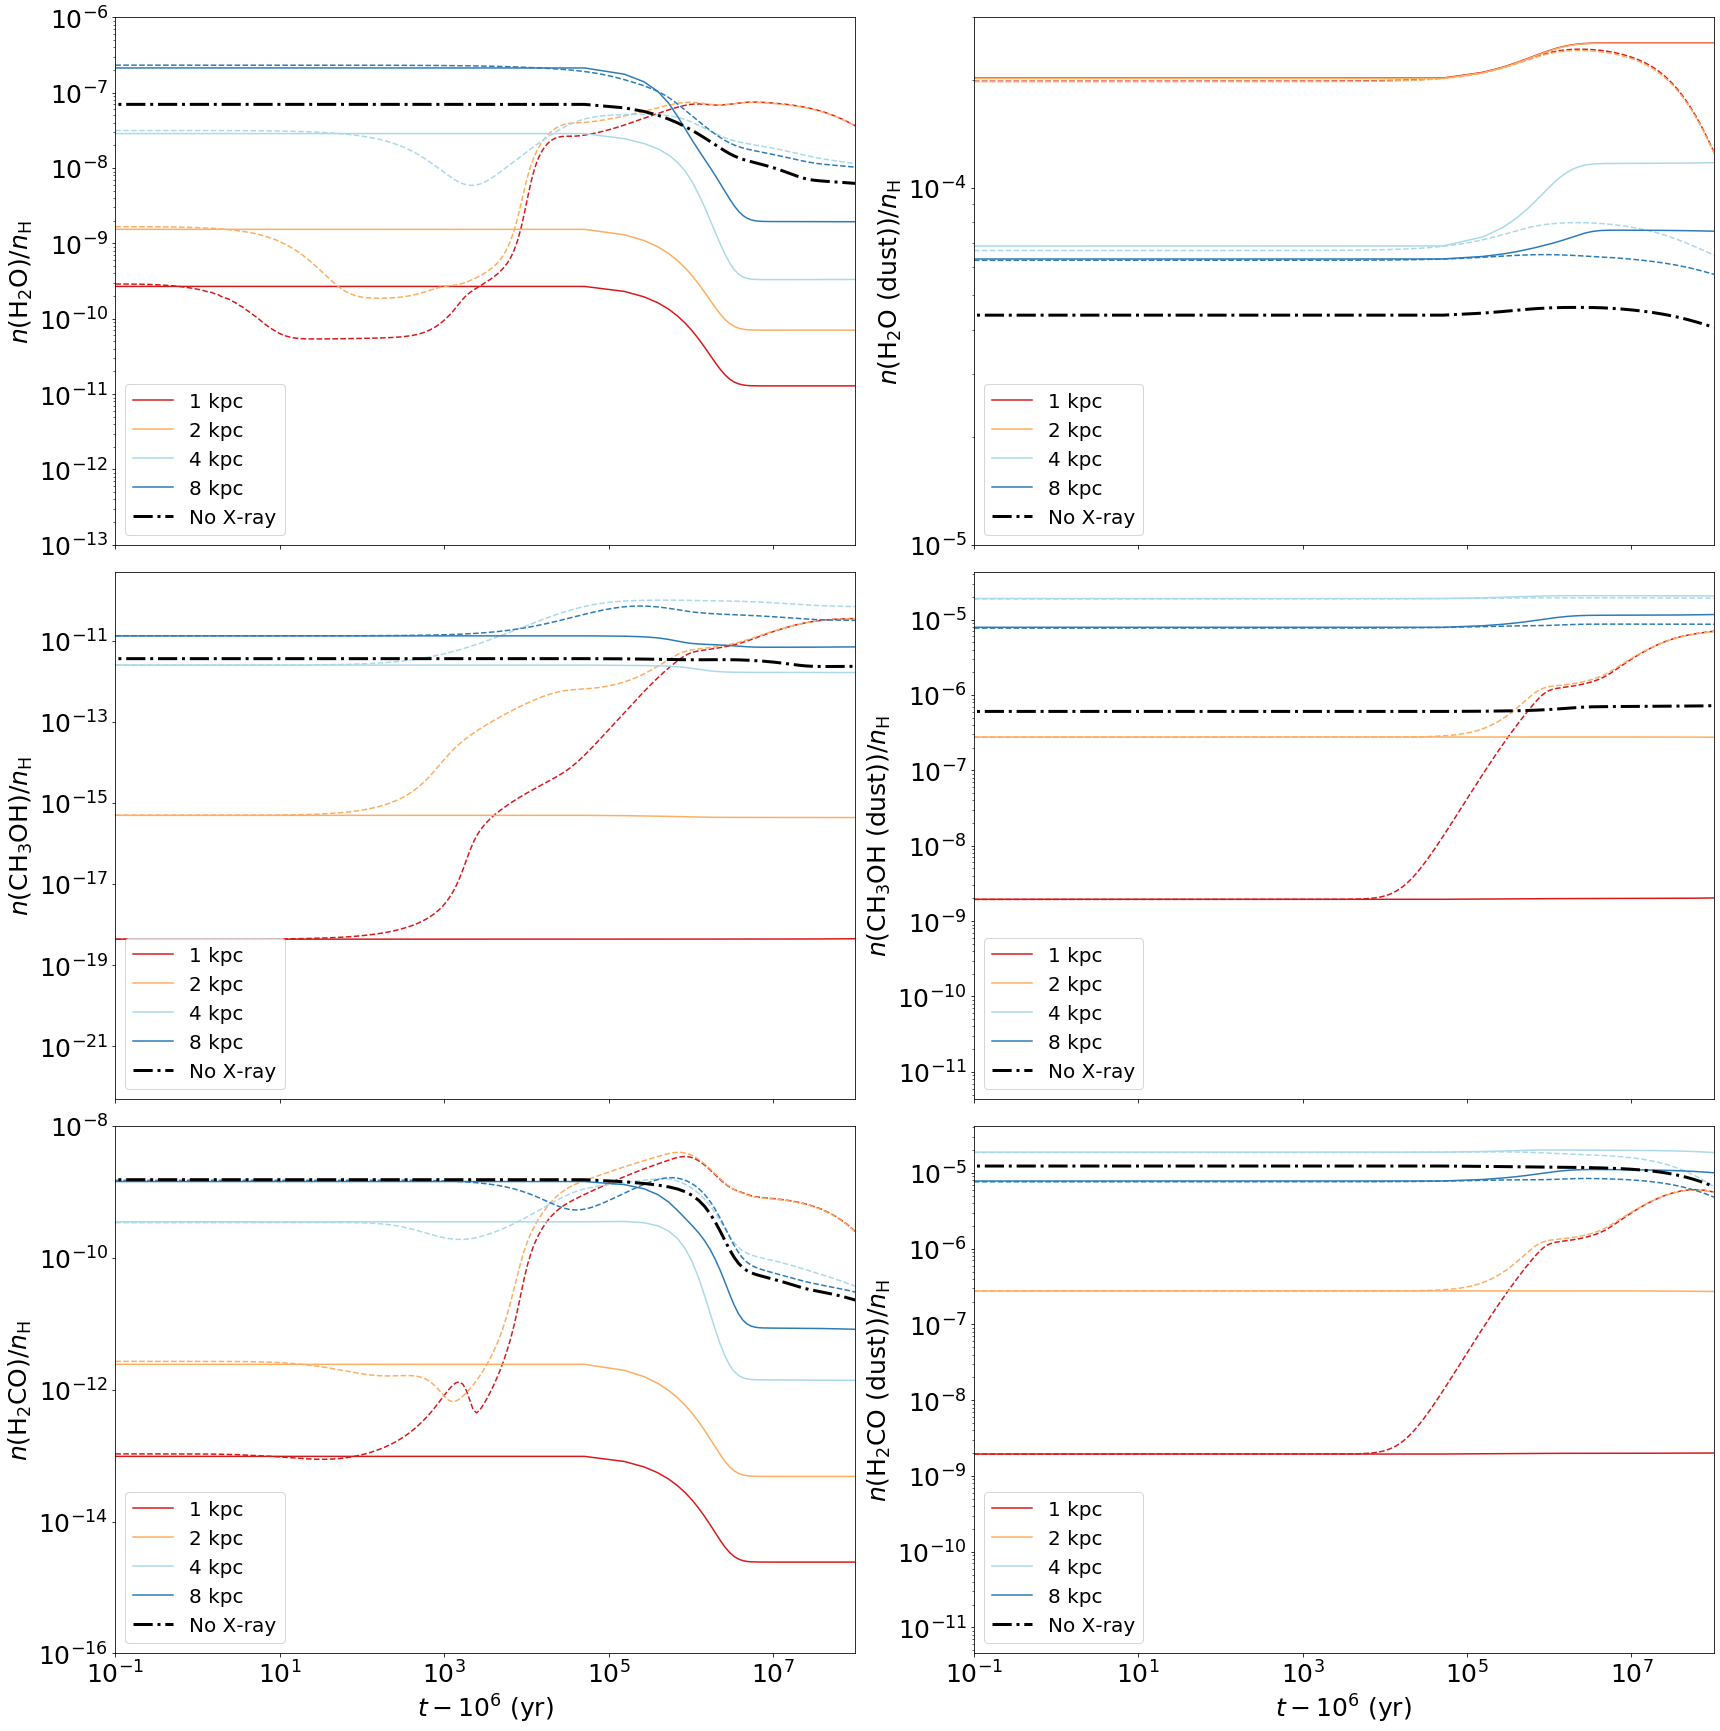

In [15]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_dis = ['#d7191c', '#fdae61', '#abd9e9', '#2c7bb6']

plot_dis('H2O', ax=ax[0], color=c_dis)
plot_dis('CH3OH', ax=ax[2], color=c_dis)
plot_dis('H2CO', ax=ax[4], color=c_dis)

plot_dis('H_DUSTH_DUSTO_DUST',
         ax=ax[1],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_dis('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[3],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_dis('H_DUSTH_DUSTC_DUSTO_DUST',
         ax=ax[5],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[0].set_ylim([1e-13, 1e-6])
ax[1].set_ylim([1e-5, 3e-4])
ax[2].set_ylim([5e-23, 5e-10])
#ax[3].set_ylim([4e-7, 5e-5])
ax[4].set_ylim([1e-16, 1e-8])
#ax[5].set_ylim([5e-6, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/galactic_distribution.eps')

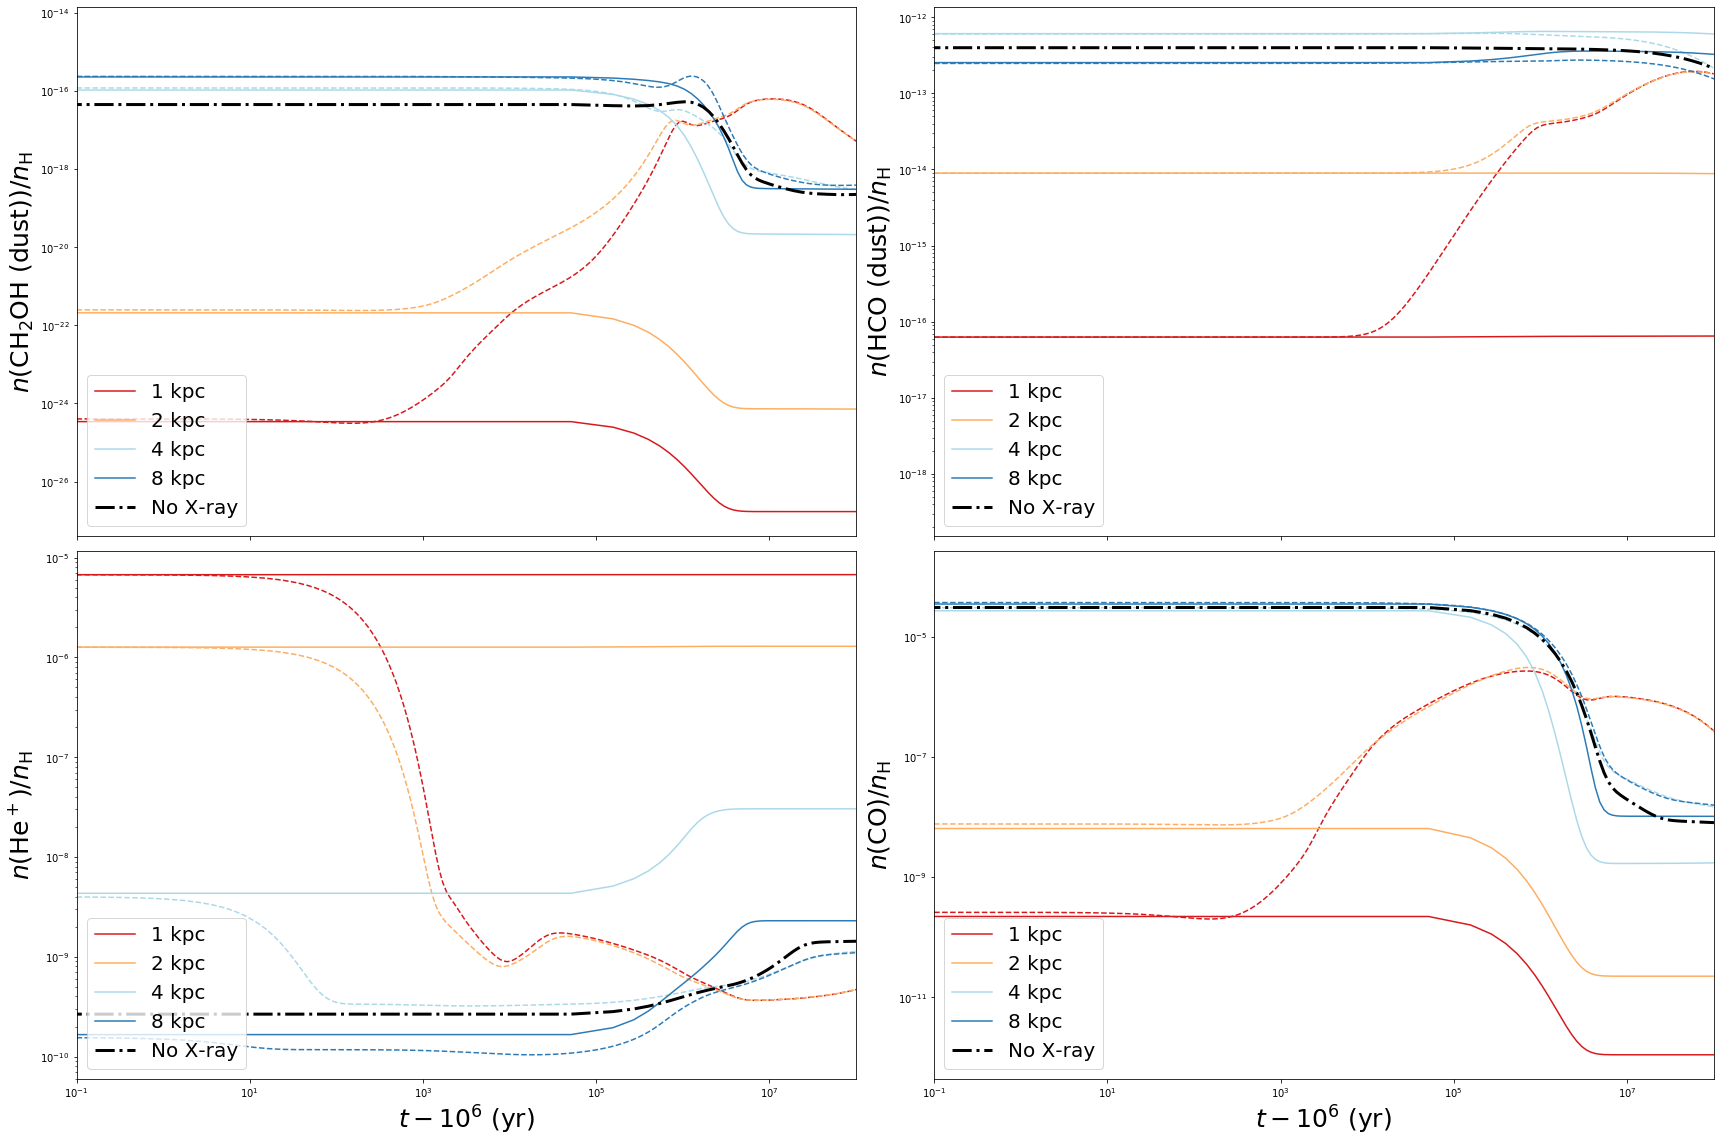

In [10]:
f, ax = plt.subplots(2, 2, figsize=(24, 16), sharex=True)
ax = ax.flatten()

plot_dis('C_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[0],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('CH2OH')))

plot_dis('H_DUSTC_DUSTO_DUST',
         ax=ax[1],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('HCO')))

plot_dis('HEj', ax=ax[2], color=c_dis)

plot_dis('CO', ax=ax[3], color=c_dis)
ax[2].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[3].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
plt.tight_layout()

## Different depths inside a molecular cloud

In [11]:
def plot_col(spe, div=None, d=4, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)

    ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                  fontsize=25)
    ax.set_xlim([1e-1, 1e8])
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot(
            ax=ax,
            spe=spe,
            color=color,
            linestyle='--',
            label=r'$N_{\mathrm{H}}=10^{22.5}$ cm$^{-2}$',
        )
        Abu0.plot_ul(ax=ax, spe=spe, color=color, Nolabel=False)

    Abu_inf = Abu('_inf')
    Abu_inf.plot(ax=ax,
                 spe=spe,
                 label=r'No X-ray, $N_{\mathrm{H}}=10^{22.5}$ cm$^{-2}$',
                 color='black')
    Abu_inf.plot_ul(ax=ax, spe=spe, color='black', Nolabel=False, NoX=True)
    ax.legend(loc='lower left', prop={'size': 20})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

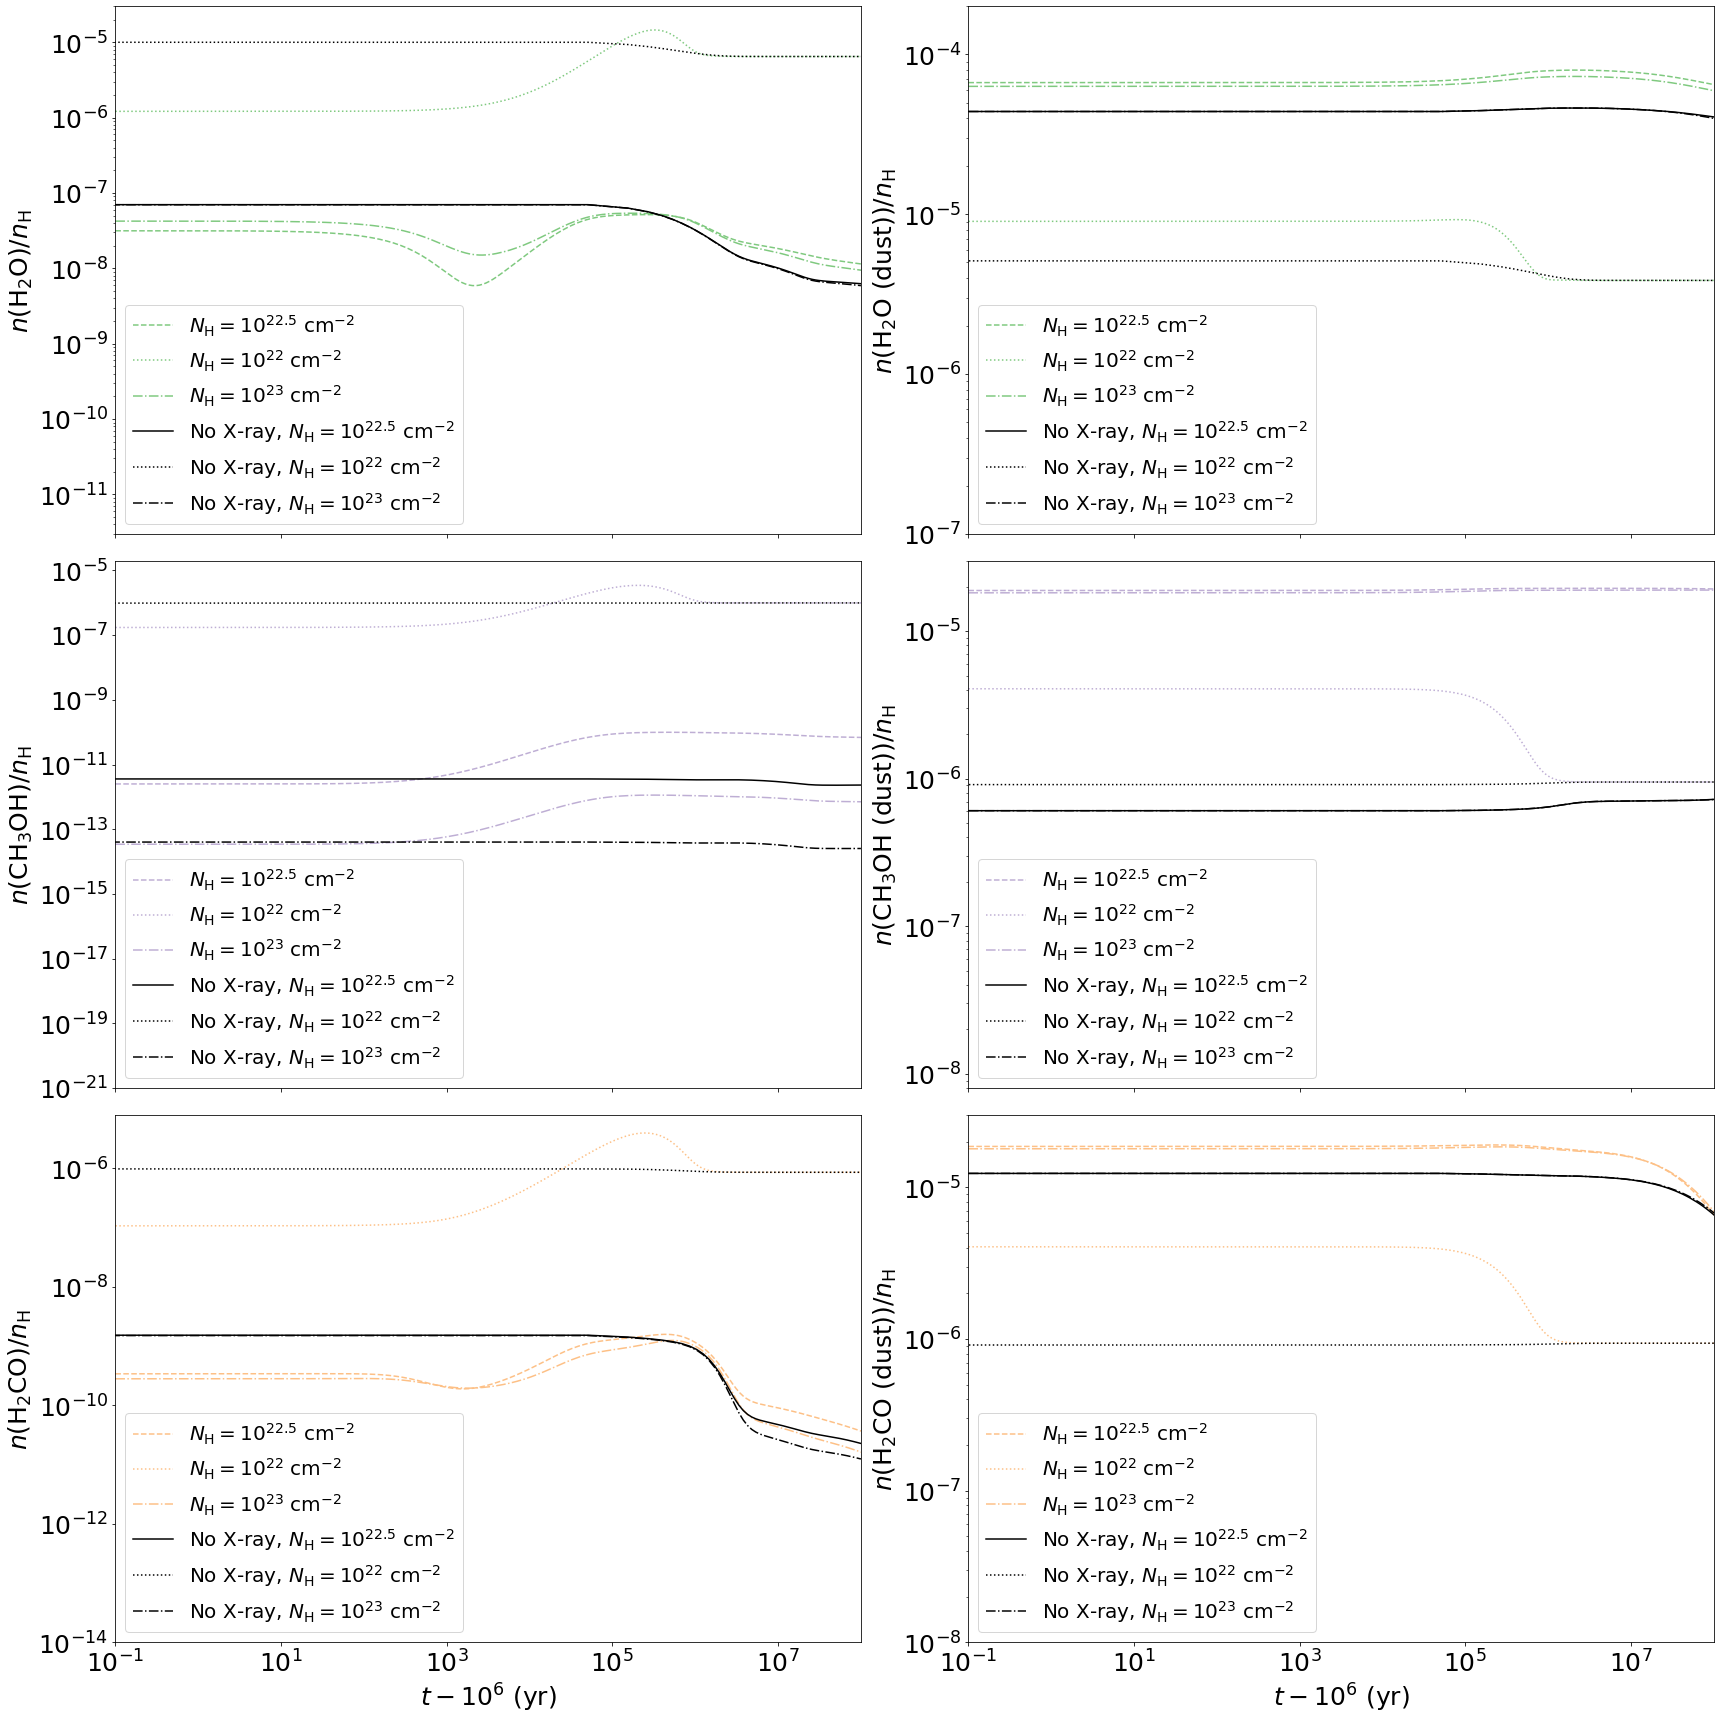

In [16]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_col('H2O', ax=ax[0], color=c_default[0])
plot_col('CH3OH', ax=ax[2], color=c_default[1])
plot_col('H2CO', ax=ax[4], color=c_default[2])

plot_col('H_DUSTH_DUSTO_DUST',
         ax=ax[1],
         color=c_default[0],
         label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_col('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[3],
         color=c_default[1],
         label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_col('H_DUSTH_DUSTC_DUSTO_DUST',
         ax=ax[5],
         color=c_default[2],
         label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[0].set_ylim([3e-12, 3e-5])
ax[1].set_ylim([1e-7, 2e-4])
ax[2].set_ylim([1e-21, 2e-5])
ax[3].set_ylim([8e-9, 3e-5])
ax[4].set_ylim([1e-14, 8e-6])
ax[5].set_ylim([1e-8, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/column_density.eps')

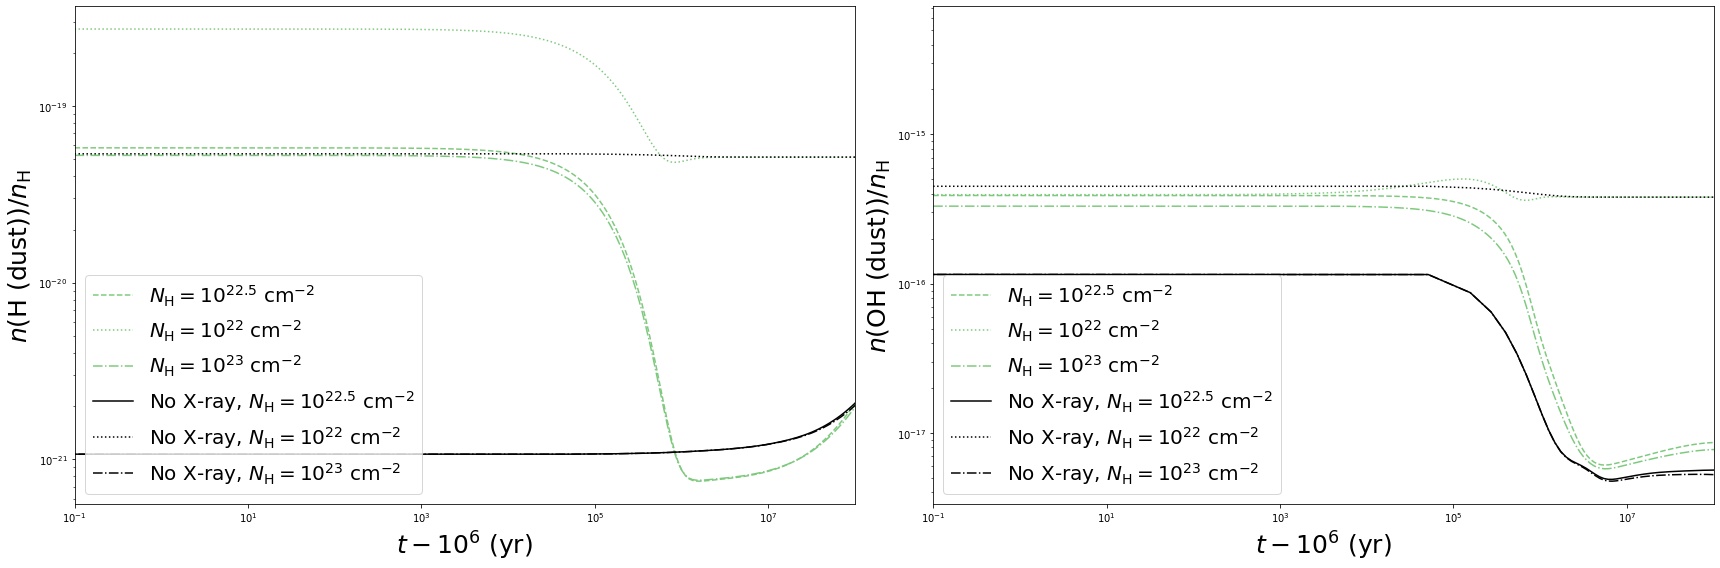

In [13]:
f, ax = plt.subplots(1, 2, figsize=(24, 8), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_col('H_DUST',
         ax=ax[0],
         color=c_default[0],
         label=r'${}$ (dust)'.format(latex_name('H')))

plot_col('O_DUSTH_DUST',
         ax=ax[1],
         color=c_default[0],
         label=r'${}$ (dust)'.format(latex_name('OH')))
ax[0].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[1].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
plt.tight_layout()